In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
img = cv2.imread(r'C:\Users\ASUS\Desktop\our project\Dataset\axial - 8 slices\Alzheimer_s Dataset\train\MildDemented\mildDem2.jpg',cv2.IMREAD_COLOR)
img1 = cv2.imread(r'C:\Users\ASUS\Desktop\our project\Dataset\axial - 8 slices\Alzheimer_s Dataset\train\ModerateDemented\moderateDem0.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread(r'C:\Users\ASUS\Desktop\our project\Dataset\axial - 8 slices\Alzheimer_s Dataset\train\NonDemented\nonDem1.jpg',cv2.IMREAD_COLOR)
img3 = cv2.imread(r'C:\Users\ASUS\Desktop\our project\Dataset\axial - 8 slices\Alzheimer_s Dataset\train\VeryMildDemented\verymildDem2.jpg',cv2.IMREAD_COLOR)
copy = img.copy()
copy1 = img1.copy()
copy2 = img2.copy()
copy3 = img3.copy()
cv2.ellipse(copy,(87,100),(40,60),0,0,360,(0,0,0),-1)
cv2.ellipse(copy1,(87,100),(40,60),0,0,360,(0,0,0),-1)
cv2.ellipse(copy2,(87,100),(40,60),0,0,360,(0,0,0),-1)
cv2.ellipse(copy3,(87,100),(40,60),0,0,360,(0,0,0),-1)
low = np.array([40,40,40])
high = np.array([120,120,120])
mask = cv2.inRange(img,low,high)
mask1 = cv2.inRange(img1,low,high)
mask2 = cv2.inRange(img2,low,high)
mask3 = cv2.inRange(img3,low,high)
#plt.imshow(mask1,'gray')
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
contours1, hierarchy1 = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours3, hierarchy3 = cv2.findContours(mask3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont_img = cv2.drawContours(img, contours, -1, (255,0,0),1)
cont_img1 = cv2.drawContours(img1, contours1, -1, (255,0,0),1)
cont_img2 = cv2.drawContours(img2, contours2, -1, (255,0,0),1)
cont_img3 = cv2.drawContours(img3, contours3, -1, (255,0,0),1)
#plt.imshow(cont_img1)
c = max(contours, key = cv2.contourArea)
c1 = max(contours1, key = cv2.contourArea)
c2 = max(contours2, key = cv2.contourArea)
c3 = max(contours3, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
x1,y1,w1,h1 = cv2.boundingRect(c1)
x2,y2,w2,h2 = cv2.boundingRect(c2)
x3,y3,w3,h3 = cv2.boundingRect(c3)
cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(255,0,0),1)
cv2.rectangle(img2,(x2,y2),(x2+w2,y2+h2),(255,0,0),1)
cv2.rectangle(img3,(x3,y3),(x3+w3,y3+h3),(255,0,0),1)
cropped = copy[y:y+h,x:x+w]
cropped1 = copy1[y:y1+h1,x:x1+w1]
cropped2 = copy2[y:y2+h2,x:x2+w2]
cropped3 = copy3[y:y3+h3,x:x3+w3]
gray = cv2.cvtColor(cropped,cv2.COLOR_RGB2GRAY)
gray1 = cv2.cvtColor(cropped1,cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(cropped2,cv2.COLOR_RGB2GRAY)
gray3 = cv2.cvtColor(cropped3,cv2.COLOR_RGB2GRAY)
#plt.imshow(cropped)
#plt.hist(gray.ravel())
#plt.hist(gray1.ravel())
cv2.imshow('1',gray)
cv2.imshow('2',gray1)
cv2.imshow('3',gray2)
cv2.imshow('4',gray3)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
plt.hist([gray.ravel(),gray1.ravel(),gray2.ravel(),gray3.ravel()],bins=3)

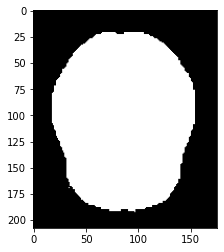

In [10]:
test=cv2.imread(r'C:\Users\ASUS\Desktop\our project\Dataset\axial - 8 slices\Alzheimer_s Dataset\train\NonDemented\nonDem0.jpg')
low = np.array([20,20,20])
high = np.array([250,250,250])
mask = cv2.inRange(test,low,high)
kernel = np.ones_like((3,3),np.uint8)
dilation = cv2.dilate(mask,kernel,iterations = 3)
erosion = cv2.erode(dilation,kernel,iterations = 3)
plt.imshow(erosion,'gray')

In [12]:
print(erosion.shape)
number_of_black_pix = np.sum(erosion == 0) 
print(number_of_black_pix)

(208, 176)
17931
